In [42]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from datetime import datetime, timedelta
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
def clean_tweet(tweet):
        # method for cleaning tweets used in clean_twitter_data dag

        tweet = re.sub(r'http\S+', '', tweet)
        # Remove mentions
        tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
        # Remove hashtags
        tweet = re.sub(r'#', '', tweet)
        # Remove non-alphabetic characters
        tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
        # Convert to lowercase
        tweet = tweet.lower()
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        words = tweet.split()
        filtered_words = [word for word in words if word not in stop_words]
        return ' '.join(filtered_words)
    
def splitScore(df):
    df['negative'] = df['score'].apply(lambda x: x.get('neg'))
    df['neutral'] = df['score'].apply(lambda x: x.get('neu'))
    df['positive'] = df['score'].apply(lambda x: x.get('pos'))
    df['compound'] = df['score'].apply(lambda x: x.get('compound'))
    return df

# Data taken from SNSCRAPE from 2019 to 2022

In [3]:
tt2019 = pd.read_csv('twitter2019.csv')
tt2020 = pd.read_csv('twitter2020.csv')
tt2021 = pd.read_csv('twitter2021.csv')
tt2022 = pd.read_csv('twitter2022.csv')

In [4]:
fullDf = pd.concat([tt2019, tt2020, tt2021, tt2022])
fullDf

Datetime  \
0       2019-01-01 23:55:28+00:00   
1       2019-01-01 23:50:06+00:00   
2       2019-01-01 23:47:43+00:00   
3       2019-01-01 23:40:28+00:00   
4       2019-01-01 23:37:55+00:00   
...                           ...   
543211  2022-12-31 00:02:05+00:00   
543212  2022-12-31 00:00:44+00:00   
543213  2022-12-31 00:00:36+00:00   
543214  2022-12-31 00:00:24+00:00   
543215  2022-12-31 00:00:15+00:00   

                                                     Text        Username  \
0       $AAPL #patent #maintenance event EXP - Patent ...        treabase   
1       Early to mid January performer : gs ， aapl  co...     qingxia_NXP   
2       Join @RobinhoodApp and we'll both get a stock ...      wetthamjoe   
3       $AAPL #patent #maintenance event EXP - Patent ...        treabase   
4       @MohnishPabrai @rickbroma I bet the shrimp at ...   88888sAccount   
...                                                   ...             ...   
543211  Most mentioned tickers in #WSB in last 6H\n\n1...    StockseraApp   
543212  $AAPL was the 5th most mentioned on wallstreet...       topstonks   
543213  Everyone, Come join an amazing group of trader...      Smith28301   
543214  $aapl Top analyst price target for next week.....  MintonRoderick   
543215  ⚠️ 𝘈𝘭𝘭 𝘚𝘵𝘰𝘤𝘬𝘴:\n\n1. $SPY 🥇\n2. $QQQ 🥈\n3. $AA...     fintwit_bot   

        likeCount  
0             0.0  
1             0.0  
2             1.0  
3             0.0  
4             0.0  
...           ...  
543211        0.0  
543212        0.0  
543213        0.0  
543214        0.0  
543215        0.0  

[1780757 rows x 4 columns]

### Removing null values or noise

In [5]:
#error or weird values when extracting from twitter
fullDf[~fullDf['Datetime'].str.startswith('20')]

Datetime          Text  \
11319                           https://t.co/2Hf0ZbjpKC            NaN   
11320                          $AAPL  132.21  to 129.35            NaN   
11321                          $TSLA  884.00  to 834.38            NaN   
11322                             $TNDM  97.60  to 95.71  sleekoptions   
18414                           https://t.co/2Hf0ZbjpKC            NaN   
...                                                  ...           ...   
423792  #aapl    #wallstreetbets https://t.co/IazcNDZOlv     topstonks   
423819                       Via https://t.co/DoXFBxbWjw           NaN   
423820  #aapl    #wallstreetbets https://t.co/FhMQ7q7j8L     topstonks   
424078                       Via https://t.co/DoXFBxbWjw           NaN   
424079  #aapl    #wallstreetbets https://t.co/p3RjyqueHA     topstonks   

       Username  likeCount  
11319       NaN        NaN  
11320       NaN        NaN  
11321       NaN        NaN  
11322         0        NaN  
18414       NaN        NaN  
...         ...        ...  
423792        0        NaN  
423819      NaN        NaN  
423820        0        NaN  
424078      NaN        NaN  
424079        0        NaN  

[1186 rows x 4 columns]

In [6]:
fullDf

Datetime  \
0       2019-01-01 23:55:28+00:00   
1       2019-01-01 23:50:06+00:00   
2       2019-01-01 23:47:43+00:00   
3       2019-01-01 23:40:28+00:00   
4       2019-01-01 23:37:55+00:00   
...                           ...   
543211  2022-12-31 00:02:05+00:00   
543212  2022-12-31 00:00:44+00:00   
543213  2022-12-31 00:00:36+00:00   
543214  2022-12-31 00:00:24+00:00   
543215  2022-12-31 00:00:15+00:00   

                                                     Text        Username  \
0       $AAPL #patent #maintenance event EXP - Patent ...        treabase   
1       Early to mid January performer : gs ， aapl  co...     qingxia_NXP   
2       Join @RobinhoodApp and we'll both get a stock ...      wetthamjoe   
3       $AAPL #patent #maintenance event EXP - Patent ...        treabase   
4       @MohnishPabrai @rickbroma I bet the shrimp at ...   88888sAccount   
...                                                   ...             ...   
543211  Most mentioned tickers in #WSB in last 6H\n\n1...    StockseraApp   
543212  $AAPL was the 5th most mentioned on wallstreet...       topstonks   
543213  Everyone, Come join an amazing group of trader...      Smith28301   
543214  $aapl Top analyst price target for next week.....  MintonRoderick   
543215  ⚠️ 𝘈𝘭𝘭 𝘚𝘵𝘰𝘤𝘬𝘴:\n\n1. $SPY 🥇\n2. $QQQ 🥈\n3. $AA...     fintwit_bot   

        likeCount  
0             0.0  
1             0.0  
2             1.0  
3             0.0  
4             0.0  
...           ...  
543211        0.0  
543212        0.0  
543213        0.0  
543214        0.0  
543215        0.0  

[1780757 rows x 4 columns]

In [7]:
fullDf = fullDf[fullDf['Datetime'].str.startswith('20')]

In [8]:
fullDf

Datetime  \
0       2019-01-01 23:55:28+00:00   
1       2019-01-01 23:50:06+00:00   
2       2019-01-01 23:47:43+00:00   
3       2019-01-01 23:40:28+00:00   
4       2019-01-01 23:37:55+00:00   
...                           ...   
543211  2022-12-31 00:02:05+00:00   
543212  2022-12-31 00:00:44+00:00   
543213  2022-12-31 00:00:36+00:00   
543214  2022-12-31 00:00:24+00:00   
543215  2022-12-31 00:00:15+00:00   

                                                     Text        Username  \
0       $AAPL #patent #maintenance event EXP - Patent ...        treabase   
1       Early to mid January performer : gs ， aapl  co...     qingxia_NXP   
2       Join @RobinhoodApp and we'll both get a stock ...      wetthamjoe   
3       $AAPL #patent #maintenance event EXP - Patent ...        treabase   
4       @MohnishPabrai @rickbroma I bet the shrimp at ...   88888sAccount   
...                                                   ...             ...   
543211  Most mentioned tickers in #WSB in last 6H\n\n1...    StockseraApp   
543212  $AAPL was the 5th most mentioned on wallstreet...       topstonks   
543213  Everyone, Come join an amazing group of trader...      Smith28301   
543214  $aapl Top analyst price target for next week.....  MintonRoderick   
543215  ⚠️ 𝘈𝘭𝘭 𝘚𝘵𝘰𝘤𝘬𝘴:\n\n1. $SPY 🥇\n2. $QQQ 🥈\n3. $AA...     fintwit_bot   

        likeCount  
0             0.0  
1             0.0  
2             1.0  
3             0.0  
4             0.0  
...           ...  
543211        0.0  
543212        0.0  
543213        0.0  
543214        0.0  
543215        0.0  

[1779571 rows x 4 columns]

In [9]:
fullDf['Date'] = fullDf['Datetime'].astype('datetime64[ns]')

C:\Users\hsinz\AppData\Local\Temp\ipykernel_4264\1199960952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullDf['Date'] = fullDf['Datetime'].astype('datetime64[ns]')


### Cleaning the tweets

In [10]:
# clean tweets
fullDf['cleanedText'] = fullDf['Text'].apply(lambda x: clean_tweet(str(x)))
fullDf

C:\Users\hsinz\AppData\Local\Temp\ipykernel_4264\3487905972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullDf['cleanedText'] = fullDf['Text'].apply(lambda x: clean_tweet(str(x)))


Datetime  \
0       2019-01-01 23:55:28+00:00   
1       2019-01-01 23:50:06+00:00   
2       2019-01-01 23:47:43+00:00   
3       2019-01-01 23:40:28+00:00   
4       2019-01-01 23:37:55+00:00   
...                           ...   
543211  2022-12-31 00:02:05+00:00   
543212  2022-12-31 00:00:44+00:00   
543213  2022-12-31 00:00:36+00:00   
543214  2022-12-31 00:00:24+00:00   
543215  2022-12-31 00:00:15+00:00   

                                                     Text        Username  \
0       $AAPL #patent #maintenance event EXP - Patent ...        treabase   
1       Early to mid January performer : gs ， aapl  co...     qingxia_NXP   
2       Join @RobinhoodApp and we'll both get a stock ...      wetthamjoe   
3       $AAPL #patent #maintenance event EXP - Patent ...        treabase   
4       @MohnishPabrai @rickbroma I bet the shrimp at ...   88888sAccount   
...                                                   ...             ...   
543211  Most mentioned tickers in #WSB in last 6H\n\n1...    StockseraApp   
543212  $AAPL was the 5th most mentioned on wallstreet...       topstonks   
543213  Everyone, Come join an amazing group of trader...      Smith28301   
543214  $aapl Top analyst price target for next week.....  MintonRoderick   
543215  ⚠️ 𝘈𝘭𝘭 𝘚𝘵𝘰𝘤𝘬𝘴:\n\n1. $SPY 🥇\n2. $QQQ 🥈\n3. $AA...     fintwit_bot   

        likeCount                Date  \
0             0.0 2019-01-01 23:55:28   
1             0.0 2019-01-01 23:50:06   
2             1.0 2019-01-01 23:47:43   
3             0.0 2019-01-01 23:40:28   
4             0.0 2019-01-01 23:37:55   
...           ...                 ...   
543211        0.0 2022-12-31 00:02:05   
543212        0.0 2022-12-31 00:00:44   
543213        0.0 2022-12-31 00:00:36   
543214        0.0 2022-12-31 00:00:24   
543215        0.0 2022-12-31 00:00:15   

                                              cleanedText  
0       aapl patent maintenance event exp patent expir...  
1       early mid january performer gs aapl could perform  
2       join well get stock like aapl f free make sure...  
3       aapl patent maintenance event exp patent expir...  
4       bet shrimp buffet defrosted beating took aapl ...  
...                                                   ...  
543211  mentioned tickers wsb last h spy tsla lmao aap...  
543212  aapl th mentioned wallstreetbets last hours vi...  
543213  everyone come join amazing group traders meso ...  
543214            aapl top analyst price target next week  
543215  spy qqq aapl spx tsla nine amzn amd swvl dia f...  

[1779571 rows x 6 columns]

### Getting sentiment score of tweets using NLTK

In [11]:
# get sentiment score of cleanedtweets
sia = SentimentIntensityAnalyzer()
fullDf['score'] = fullDf['cleanedText'].apply(lambda x: sia.polarity_scores(x))
fullDf

C:\Users\hsinz\AppData\Local\Temp\ipykernel_4264\4150007670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullDf['score'] = fullDf['cleanedText'].apply(lambda x: sia.polarity_scores(x))


Datetime  \
0       2019-01-01 23:55:28+00:00   
1       2019-01-01 23:50:06+00:00   
2       2019-01-01 23:47:43+00:00   
3       2019-01-01 23:40:28+00:00   
4       2019-01-01 23:37:55+00:00   
...                           ...   
543211  2022-12-31 00:02:05+00:00   
543212  2022-12-31 00:00:44+00:00   
543213  2022-12-31 00:00:36+00:00   
543214  2022-12-31 00:00:24+00:00   
543215  2022-12-31 00:00:15+00:00   

                                                     Text        Username  \
0       $AAPL #patent #maintenance event EXP - Patent ...        treabase   
1       Early to mid January performer : gs ， aapl  co...     qingxia_NXP   
2       Join @RobinhoodApp and we'll both get a stock ...      wetthamjoe   
3       $AAPL #patent #maintenance event EXP - Patent ...        treabase   
4       @MohnishPabrai @rickbroma I bet the shrimp at ...   88888sAccount   
...                                                   ...             ...   
543211  Most mentioned tickers in #WSB in last 6H\n\n1...    StockseraApp   
543212  $AAPL was the 5th most mentioned on wallstreet...       topstonks   
543213  Everyone, Come join an amazing group of trader...      Smith28301   
543214  $aapl Top analyst price target for next week.....  MintonRoderick   
543215  ⚠️ 𝘈𝘭𝘭 𝘚𝘵𝘰𝘤𝘬𝘴:\n\n1. $SPY 🥇\n2. $QQQ 🥈\n3. $AA...     fintwit_bot   

        likeCount                Date  \
0             0.0 2019-01-01 23:55:28   
1             0.0 2019-01-01 23:50:06   
2             1.0 2019-01-01 23:47:43   
3             0.0 2019-01-01 23:40:28   
4             0.0 2019-01-01 23:37:55   
...           ...                 ...   
543211        0.0 2022-12-31 00:02:05   
543212        0.0 2022-12-31 00:00:44   
543213        0.0 2022-12-31 00:00:36   
543214        0.0 2022-12-31 00:00:24   
543215        0.0 2022-12-31 00:00:15   

                                              cleanedText  \
0       aapl patent maintenance event exp patent expir...   
1       early mid january performer gs aapl could perform   
2       join well get stock like aapl f free make sure...   
3       aapl patent maintenance event exp patent expir...   
4       bet shrimp buffet defrosted beating took aapl ...   
...                                                   ...   
543211  mentioned tickers wsb last h spy tsla lmao aap...   
543212  aapl th mentioned wallstreetbets last hours vi...   
543213  everyone come join amazing group traders meso ...   
543214            aapl top analyst price target next week   
543215  spy qqq aapl spx tsla nine amzn amd swvl dia f...   

                                                    score  
0       {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...  
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2       {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'comp...  
3       {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...  
4       {'neg': 0.273, 'neu': 0.727, 'pos': 0.0, 'comp...  
...                                                   ...  
543211  {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp...  
543212  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
543213  {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'comp...  
543214  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...  
543215  {'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...  

[1779571 rows x 7 columns]

In [45]:
fullDf = splitScore(fullDf)
fullDf

C:\Users\hsinz\AppData\Local\Temp\ipykernel_4264\164875761.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['negative'] = df['score'].apply(lambda x: x.get('neg'))
C:\Users\hsinz\AppData\Local\Temp\ipykernel_4264\164875761.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neutral'] = df['score'].apply(lambda x: x.get('neu'))
C:\Users\hsinz\AppData\Local\Temp\ipykernel_4264\164875761.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Datetime  \
0       2019-01-01 23:55:28+00:00   
1       2019-01-01 23:50:06+00:00   
2       2019-01-01 23:47:43+00:00   
3       2019-01-01 23:40:28+00:00   
4       2019-01-01 23:37:55+00:00   
...                           ...   
543211  2022-12-31 00:02:05+00:00   
543212  2022-12-31 00:00:44+00:00   
543213  2022-12-31 00:00:36+00:00   
543214  2022-12-31 00:00:24+00:00   
543215  2022-12-31 00:00:15+00:00   

                                                     Text        Username  \
0       $AAPL #patent #maintenance event EXP - Patent ...        treabase   
1       Early to mid January performer : gs ， aapl  co...     qingxia_NXP   
2       Join @RobinhoodApp and we'll both get a stock ...      wetthamjoe   
3       $AAPL #patent #maintenance event EXP - Patent ...        treabase   
4       @MohnishPabrai @rickbroma I bet the shrimp at ...   88888sAccount   
...                                                   ...             ...   
543211  Most mentioned tickers in #WSB in last 6H\n\n1...    StockseraApp   
543212  $AAPL was the 5th most mentioned on wallstreet...       topstonks   
543213  Everyone, Come join an amazing group of trader...      Smith28301   
543214  $aapl Top analyst price target for next week.....  MintonRoderick   
543215  ⚠️ 𝘈𝘭𝘭 𝘚𝘵𝘰𝘤𝘬𝘴:\n\n1. $SPY 🥇\n2. $QQQ 🥈\n3. $AA...     fintwit_bot   

        likeCount                Date  \
0             0.0 2019-01-01 23:55:28   
1             0.0 2019-01-01 23:50:06   
2             1.0 2019-01-01 23:47:43   
3             0.0 2019-01-01 23:40:28   
4             0.0 2019-01-01 23:37:55   
...           ...                 ...   
543211        0.0 2022-12-31 00:02:05   
543212        0.0 2022-12-31 00:00:44   
543213        0.0 2022-12-31 00:00:36   
543214        0.0 2022-12-31 00:00:24   
543215        0.0 2022-12-31 00:00:15   

                                              cleanedText  \
0       aapl patent maintenance event exp patent expir...   
1       early mid january performer gs aapl could perform   
2       join well get stock like aapl f free make sure...   
3       aapl patent maintenance event exp patent expir...   
4       bet shrimp buffet defrosted beating took aapl ...   
...                                                   ...   
543211  mentioned tickers wsb last h spy tsla lmao aap...   
543212  aapl th mentioned wallstreetbets last hours vi...   
543213  everyone come join amazing group traders meso ...   
543214            aapl top analyst price target next week   
543215  spy qqq aapl spx tsla nine amzn amd swvl dia f...   

                                                    score  negative  neutral  \
0       {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...     0.343    0.657   
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...     0.000    1.000   
2       {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'comp...     0.000    0.326   
3       {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...     0.343    0.657   
4       {'neg': 0.273, 'neu': 0.727, 'pos': 0.0, 'comp...     0.273    0.727   
...                                                   ...       ...      ...   
543211  {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp...     0.000    0.678   
543212  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...     0.000    1.000   
543213  {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'comp...     0.000    0.829   
543214  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...     0.000    0.769   
543215  {'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...     0.000    0.837   

        positive  compound  month  year  
0          0.000   -0.5719      1  2019  
1          0.000    0.0000      1  2019  
2          0.674    0.8860      1  2019  
3          0.000   -0.5719      1  2019  
4          0.000   -0.4588      1  2019  
...          ...       ...    ...   ...  
543211     0.322    0.6908     12  2022  
543212     0.000    0.0000     12  2022  
543213     0.171    0.7184     12  2022  
543214     0.231    0.2023     12  2022  
543215

### Aggregating and getting weekly sentiment scores

In [13]:
# Convert to weekly average scores
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2022-12-31')

days_to_subtract = (7 + start_date.weekday()) % 7
start_date -= timedelta(days=days_to_subtract)

weeks = pd.date_range(start=start_date, end=end_date, freq='W-TUE')

scores = []

for week in weeks:
    start_week = week
    end_week = week + pd.Timedelta(days=6)
    week_scores = fullDf[fullDf['Date'].between(start_week, end_week, inclusive='both')][['likeCount', 'compound']]
    twitterVol = len(week_scores)
    avgLikes = week_scores['likeCount'].mean()
    week_scores['likeCount'] = week_scores['likeCount'] + 1 # Smoothing
    if len(week_scores) > 0:
        scores.append({
            'Week Start': start_week, 
            'Week End': end_week, 
            'Tweets_Volume': twitterVol,
            'Average_Likes': avgLikes,
            'Twitter_Sentiment_Score': week_scores['compound'].mean(),
            'Twitter_Weighted_Sentiment_Score': (week_scores['likeCount'] * week_scores['compound']).sum() / week_scores['likeCount'].sum()
        })
        
finalTable = pd.DataFrame(scores)
finalTable

Week Start   Week End  Tweets_Volume  Average_Likes  \
0   2019-01-01 2019-01-07           7706       3.377498   
1   2019-01-08 2019-01-14           6432       2.003576   
2   2019-01-15 2019-01-21           5678       0.977633   
3   2019-01-22 2019-01-28           5564       1.153307   
4   2019-01-29 2019-02-04           7400       2.640676   
..         ...        ...            ...            ...   
204 2022-11-29 2022-12-05          10923       8.523666   
205 2022-12-06 2022-12-12           9992       6.671737   
206 2022-12-13 2022-12-19          10131       3.045109   
207 2022-12-20 2022-12-26           9832       4.510578   
208 2022-12-27 2023-01-02           9277       4.778161   

     Twitter_Sentiment_Score  Twitter_Weighted_Sentiment_Score  
0                   0.092662                          0.048722  
1                   0.188330                          0.175603  
2                   0.222409                          0.225401  
3                   0.216925                          0.153582  
4                   0.178135                          0.127374  
..                       ...                               ...  
204                 0.165352                          0.068209  
205                 0.190853                          0.222123  
206                 0.199082                          0.105450  
207                 0.187134                          0.080198  
208                 0.152602                          0.111389  

[209 rows x 6 columns]

### Setting the threshold for sentiment scores 

In [14]:
# positive sentiment : (compound score >= 0.05) 
# neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
# negative sentiment : (compound score <= -0.05)
def sentiment(score):
    if (score >= 0.05):
        return 'positive'
    elif (score <= -0.05):
        return 'negative'
    else:
        return 'neutral'

In [15]:
finalTable['weightedSentiment'] = finalTable['Twitter_Weighted_Sentiment_Score'].apply(sentiment)
finalTable

Week Start   Week End  Tweets_Volume  Average_Likes  \
0   2019-01-01 2019-01-07           7706       3.377498   
1   2019-01-08 2019-01-14           6432       2.003576   
2   2019-01-15 2019-01-21           5678       0.977633   
3   2019-01-22 2019-01-28           5564       1.153307   
4   2019-01-29 2019-02-04           7400       2.640676   
..         ...        ...            ...            ...   
204 2022-11-29 2022-12-05          10923       8.523666   
205 2022-12-06 2022-12-12           9992       6.671737   
206 2022-12-13 2022-12-19          10131       3.045109   
207 2022-12-20 2022-12-26           9832       4.510578   
208 2022-12-27 2023-01-02           9277       4.778161   

     Twitter_Sentiment_Score  Twitter_Weighted_Sentiment_Score  \
0                   0.092662                          0.048722   
1                   0.188330                          0.175603   
2                   0.222409                          0.225401   
3                   0.216925                          0.153582   
4                   0.178135                          0.127374   
..                       ...                               ...   
204                 0.165352                          0.068209   
205                 0.190853                          0.222123   
206                 0.199082                          0.105450   
207                 0.187134                          0.080198   
208                 0.152602                          0.111389   

    weightedSentiment  
0             neutral  
1            positive  
2            positive  
3            positive  
4            positive  
..                ...  
204          positive  
205          positive  
206          positive  
207          positive  
208          positive  

[209 rows x 7 columns]

In [17]:
finalTable.to_csv('twitterComments.csv')

### EDA for twitter data

In [18]:
fullDf['month'] = fullDf['Date'].dt.month
fullDf['year'] = fullDf['Date'].dt.year

C:\Users\hsinz\AppData\Local\Temp\ipykernel_4264\932238649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullDf['month'] = fullDf['Date'].dt.month
C:\Users\hsinz\AppData\Local\Temp\ipykernel_4264\932238649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullDf['year'] = fullDf['Date'].dt.year


In [19]:
fullDf

Datetime  \
0       2019-01-01 23:55:28+00:00   
1       2019-01-01 23:50:06+00:00   
2       2019-01-01 23:47:43+00:00   
3       2019-01-01 23:40:28+00:00   
4       2019-01-01 23:37:55+00:00   
...                           ...   
543211  2022-12-31 00:02:05+00:00   
543212  2022-12-31 00:00:44+00:00   
543213  2022-12-31 00:00:36+00:00   
543214  2022-12-31 00:00:24+00:00   
543215  2022-12-31 00:00:15+00:00   

                                                     Text        Username  \
0       $AAPL #patent #maintenance event EXP - Patent ...        treabase   
1       Early to mid January performer : gs ， aapl  co...     qingxia_NXP   
2       Join @RobinhoodApp and we'll both get a stock ...      wetthamjoe   
3       $AAPL #patent #maintenance event EXP - Patent ...        treabase   
4       @MohnishPabrai @rickbroma I bet the shrimp at ...   88888sAccount   
...                                                   ...             ...   
543211  Most mentioned tickers in #WSB in last 6H\n\n1...    StockseraApp   
543212  $AAPL was the 5th most mentioned on wallstreet...       topstonks   
543213  Everyone, Come join an amazing group of trader...      Smith28301   
543214  $aapl Top analyst price target for next week.....  MintonRoderick   
543215  ⚠️ 𝘈𝘭𝘭 𝘚𝘵𝘰𝘤𝘬𝘴:\n\n1. $SPY 🥇\n2. $QQQ 🥈\n3. $AA...     fintwit_bot   

        likeCount                Date  \
0             0.0 2019-01-01 23:55:28   
1             0.0 2019-01-01 23:50:06   
2             1.0 2019-01-01 23:47:43   
3             0.0 2019-01-01 23:40:28   
4             0.0 2019-01-01 23:37:55   
...           ...                 ...   
543211        0.0 2022-12-31 00:02:05   
543212        0.0 2022-12-31 00:00:44   
543213        0.0 2022-12-31 00:00:36   
543214        0.0 2022-12-31 00:00:24   
543215        0.0 2022-12-31 00:00:15   

                                              cleanedText  \
0       aapl patent maintenance event exp patent expir...   
1       early mid january performer gs aapl could perform   
2       join well get stock like aapl f free make sure...   
3       aapl patent maintenance event exp patent expir...   
4       bet shrimp buffet defrosted beating took aapl ...   
...                                                   ...   
543211  mentioned tickers wsb last h spy tsla lmao aap...   
543212  aapl th mentioned wallstreetbets last hours vi...   
543213  everyone come join amazing group traders meso ...   
543214            aapl top analyst price target next week   
543215  spy qqq aapl spx tsla nine amzn amd swvl dia f...   

                                                    score  negative  neutral  \
0       {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...     0.343    0.657   
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...     0.000    1.000   
2       {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'comp...     0.000    0.326   
3       {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...     0.343    0.657   
4       {'neg': 0.273, 'neu': 0.727, 'pos': 0.0, 'comp...     0.273    0.727   
...                                                   ...       ...      ...   
543211  {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp...     0.000    0.678   
543212  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...     0.000    1.000   
543213  {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'comp...     0.000    0.829   
543214  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...     0.000    0.769   
543215  {'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...     0.000    0.837   

        positive  compound  month  year  
0          0.000   -0.5719      1  2019  
1          0.000    0.0000      1  2019  
2          0.674    0.8860      1  2019  
3          0.000   -0.5719      1  2019  
4          0.000   -0.4588      1  2019  
...          ...       ...    ...   ...  
543211     0.322    0.6908     12  2022  
543212     0.000    0.0000     12  2022  
543213     0.171    0.7184     12  2022  
543214     0.231    0.2023     12  2022  
543215

In [20]:
grouped_data = fullDf.groupby(['year', 'month'])['cleanedText'].apply(lambda x: ' '.join(x)).reset_index()
grouped_data

year  month                                        cleanedText
0   2019      1  aapl patent maintenance event exp patent expir...
1   2019      2  join well get stock like aapl f free make sure...
2   2019      3  microsoft putting final nail coffin apple watc...
3   2019      4  fx leadership aapl tsla fb april apple founded...
4   2019      5  market view going tomorrow spx esf spy ndx nqf...
5   2019      6  nflx monthly time frame area failed hard formi...
6   2019      7  aapl loss apples expansion slot utility app re...
7   2019      8  believe amp look aapl vs matter dont agree ceo...
8   2019      9  well memory serves lt dan got ipo share right ...
9   2019     10  could x money days btc tlry fb nvda bynd twlo ...
10  2019     11  yal see jump aapl got rejected times went supe...
11  2019     12  cyber monday iphone amp plus deals best apple ...
12  2020      1  jan nd gmt jpy flash crash backdrop risk avers...
13  2020      2  back rally broken jan focus stocks parabolic m...
14  2020      3  rt stockfamily spy always never bull bear opti...
15  2020      4  aapl stop taking cut amzn video purchases app ...
16  2020      5  charts tomorrow morning spy qqq iwm vix xbi xl...
17  2020      6  aapl close key resistance time highs spx aapl ...
18  2020      7  mcd delaying opening store dining another week...
19  2020      8  watching adbe looking breakout wedge bullish s...
20  2020      9  aapl finished strong today keep chippin one st...
21  2020     10  kink nov exp iv aapl still works module shows ...
22  2020     11  killer month gang aapl jmia zm nflx spy atvi w...
23  2020     12  im looking forward amd aapl might put focus fb...
24  2021      1  spy spx etsy ndx qqq tsla aapl amzn twtr fb ms...
25  2021      2  momentum builds canoo amid apple buzz article ...
26  2021      3  buy amp hold cytr aldoxorubicin fda approval p...
27  2021      4  spy spx v ndx qqq tsla pltr aapl amzn twtr fb ...
28  2021      5  airpods revenue couple years half netflix reve...
29  2021      6  last hours stocks trending among elite fintwit...
30  2021      7  aapl new article apple expands north carolina ...
31  2021      8  aapl jul calls alerted jul peak alert daily pr...
32  2021      9  correct oln chose bb instead aapl back decembe...
33  2021     10  active names today mrk aapl amc f amd edu nok ...
34  2021     11  basically opposite sold tsla today bought aapl...
35  2021     12  aapl stock sets new alltime high iphone lineup...
36  2022      1  invested apple aapl made roi also bought new l...
37  2022      2  wouldnt pity ken griffin citadel one day walki...
38  2022      3  twitters top stocks spy price mentions tsla pr...
39  2022      4  get apple health iphone apple watch aapl excep...
40  2022      5  chart smarter brendan mccarty amp doug busch l...
41  2022      6  twitters rise crm price mentions efoi price me...
42  2022      7  basket stocks friday july spy aapl amd qqq aff...
43  2022      8  twitters top stocks spy price mentions tsla pr...
44  2022      9  blackberry gave way apple yielded samsung xiao...
45  2022     10  qqq aapl spy iwm link please authenticity ty s...
46  2022     11  kgji edtx zsan dont try time market cant smart...
47  2022     12  apple inc aapl price close tsla winner another...

In [21]:
def removeWords(string):
    wordsToRemove = ['apple', 'aapl', 'appl', 'spy', 'qqq', 'stocks', 'stock', 'amzn', 'fb']
    for word in wordsToRemove:
        string = string.replace(word, '')
    return string

grouped_data['cleanedText2'] = grouped_data['cleanedText'].apply(lambda x: removeWords(x))
grouped_data

year  month                                        cleanedText  \
0   2019      1  aapl patent maintenance event exp patent expir...   
1   2019      2  join well get stock like aapl f free make sure...   
2   2019      3  microsoft putting final nail coffin apple watc...   
3   2019      4  fx leadership aapl tsla fb april apple founded...   
4   2019      5  market view going tomorrow spx esf spy ndx nqf...   
5   2019      6  nflx monthly time frame area failed hard formi...   
6   2019      7  aapl loss apples expansion slot utility app re...   
7   2019      8  believe amp look aapl vs matter dont agree ceo...   
8   2019      9  well memory serves lt dan got ipo share right ...   
9   2019     10  could x money days btc tlry fb nvda bynd twlo ...   
10  2019     11  yal see jump aapl got rejected times went supe...   
11  2019     12  cyber monday iphone amp plus deals best apple ...   
12  2020      1  jan nd gmt jpy flash crash backdrop risk avers...   
13  2020      2  back rally broken jan focus stocks parabolic m...   
14  2020      3  rt stockfamily spy always never bull bear opti...   
15  2020      4  aapl stop taking cut amzn video purchases app ...   
16  2020      5  charts tomorrow morning spy qqq iwm vix xbi xl...   
17  2020      6  aapl close key resistance time highs spx aapl ...   
18  2020      7  mcd delaying opening store dining another week...   
19  2020      8  watching adbe looking breakout wedge bullish s...   
20  2020      9  aapl finished strong today keep chippin one st...   
21  2020     10  kink nov exp iv aapl still works module shows ...   
22  2020     11  killer month gang aapl jmia zm nflx spy atvi w...   
23  2020     12  im looking forward amd aapl might put focus fb...   
24  2021      1  spy spx etsy ndx qqq tsla aapl amzn twtr fb ms...   
25  2021      2  momentum builds canoo amid apple buzz article ...   
26  2021      3  buy amp hold cytr aldoxorubicin fda approval p...   
27  2021      4  spy spx v ndx qqq tsla pltr aapl amzn twtr fb ...   
28  2021      5  airpods revenue couple years half netflix reve...   
29  2021      6  last hours stocks trending among elite fintwit...   
30  2021      7  aapl new article apple expands north carolina ...   
31  2021      8  aapl jul calls alerted jul peak alert daily pr...   
32  2021      9  correct oln chose bb instead aapl back decembe...   
33  2021     10  active names today mrk aapl amc f amd edu nok ...   
34  2021     11  basically opposite sold tsla today bought aapl...   
35  2021     12  aapl stock sets new alltime high iphone lineup...   
36  2022      1  invested apple aapl made roi also bought new l...   
37  2022      2  wouldnt pity ken griffin citadel one day walki...   
38  2022      3  twitters top stocks spy price mentions tsla pr...   
39  2022      4  get apple health iphone apple watch aapl excep...   
40  2022      5  chart smarter brendan mccarty amp doug busch l...   
41  2022      6  twitters rise crm price mentions efoi price me...   
42  2022      7  basket stocks friday july spy aapl amd qqq aff...   
43  2022      8  twitters top stocks spy price mentions tsla pr...   
44  2022      9  blackberry gave way apple yielded samsung xiao...   
45  2022     10  qqq aapl spy iwm link please authenticity ty s...   
46  2022     11  kgji edtx zsan dont try time market cant smart...   
47  2022     12  apple inc aapl price close tsla winner another...   

                                         cleanedText2  
0    patent maintenance event exp patent expired f...  
1   join well get  like  f free make sure use link...  
2   microsoft putting final nail coffin  watch com...  
3   fx leadership  tsla  april  founded cupertino ...  
4   market view going tomorrow spx esf  ndx nqf   ...  
5   nflx monthly time frame area failed hard formi...  
6    loss s expansion slot utility app returns dec...  
7   believe amp look  vs matter dont agree ceo ple...  
8   well memory serves lt dan got ipo share right ...  
9   could x m

### Common words and wordcloud

In [22]:
# trying to get some useful information about the monthly text
import re
import collections
text = grouped_data.iloc[0]['cleanedText2']
words = re.findall(r'\b\w+\b', text)

# count the occurrence of each word
word_count = collections.Counter(words)

# get the top 5 most common words
top_words = word_count.most_common(20)

# print the top 5 most common words
print(top_words)

[('free', 4112), ('like', 4089), ('get', 3651), ('nflx', 3643), ('market', 3249), ('well', 3198), ('make', 3180), ('f', 3148), ('tsla', 3002), ('use', 2939), ('sure', 2911), ('link', 2846), ('join', 2817), ('jan', 2433), ('iphone', 2284), ('pm', 2245), ('nvda', 2031), ('googl', 2001), ('earnings', 1878), ('msft', 1832)]


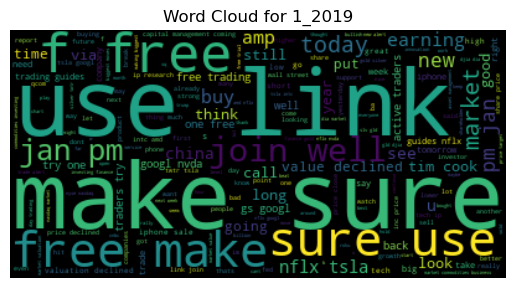

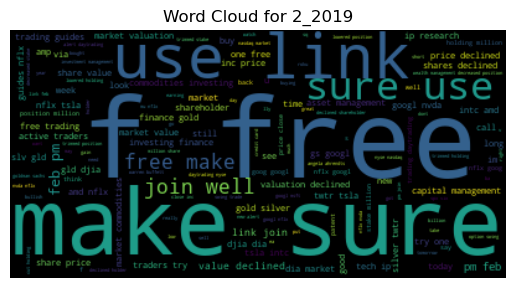

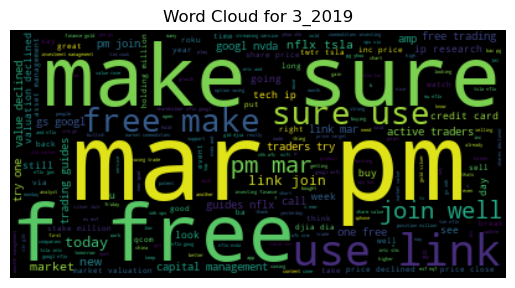

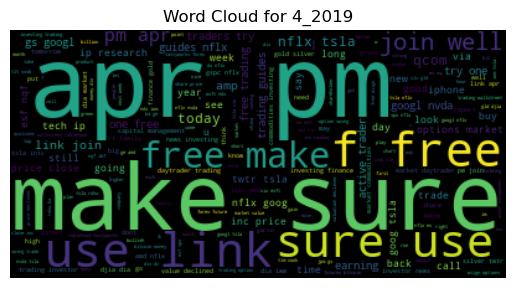

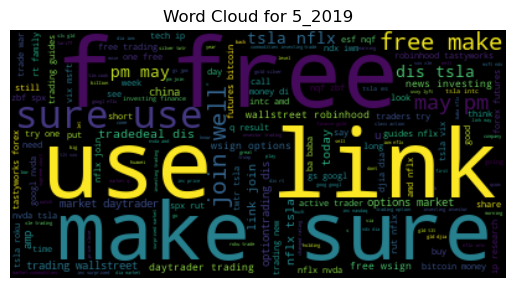

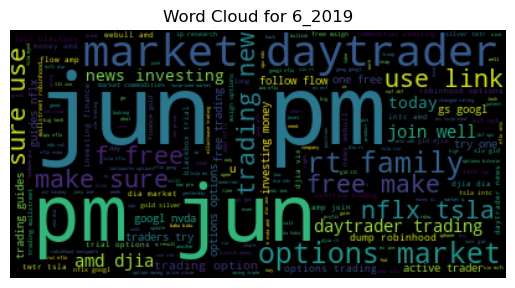

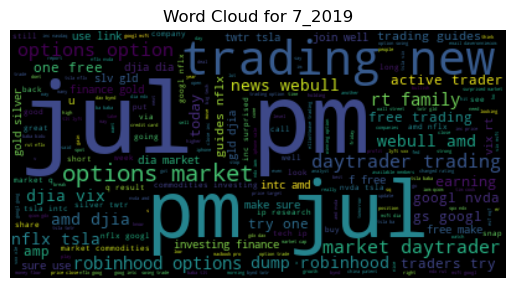

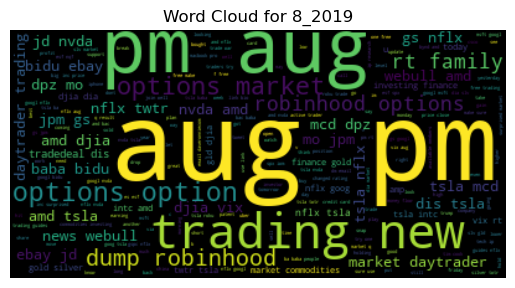

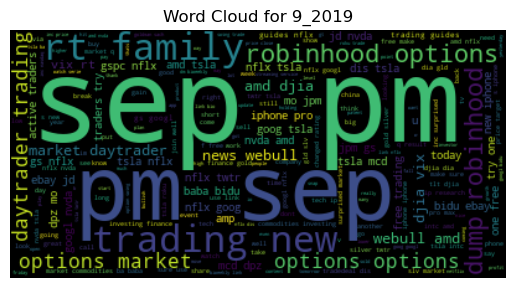

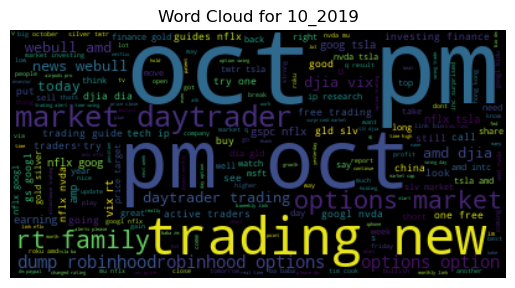

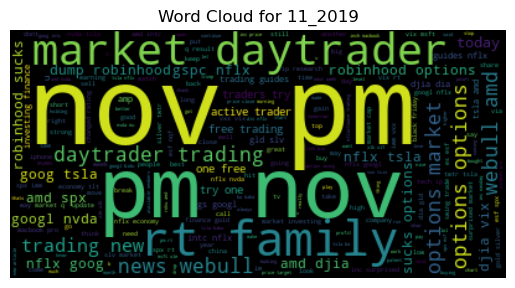

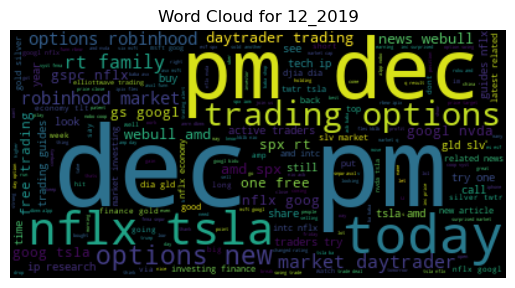

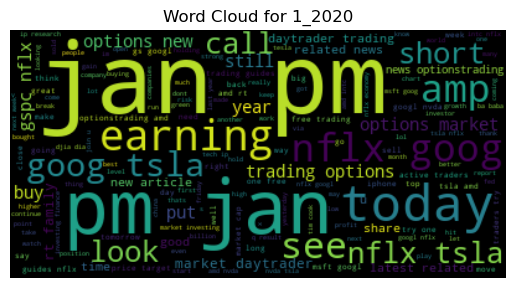

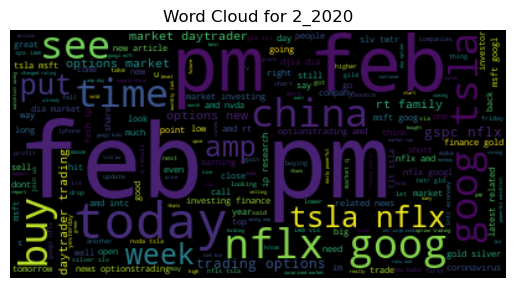

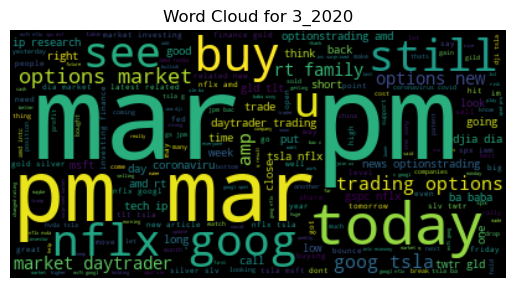

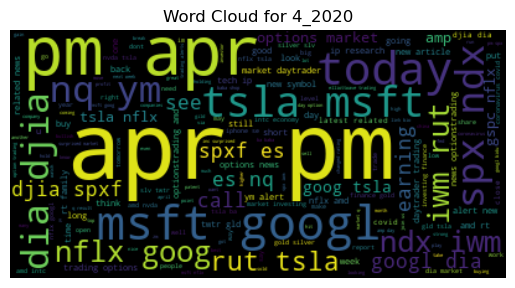

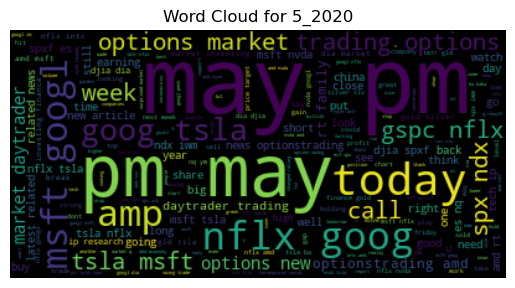

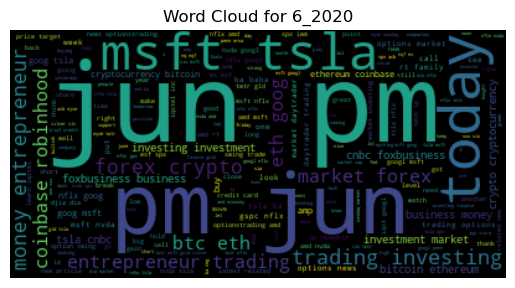

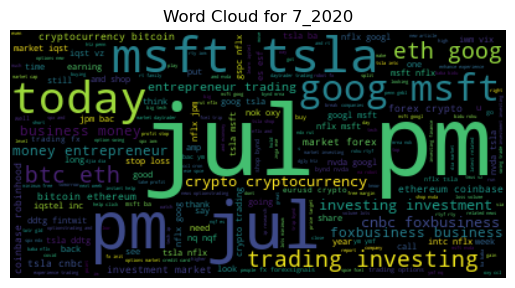

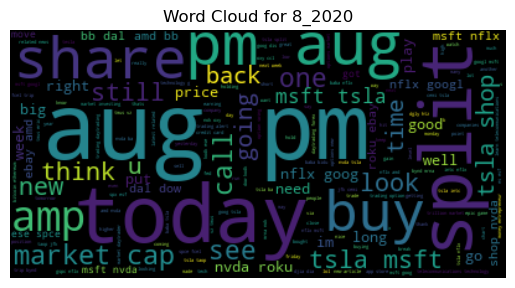

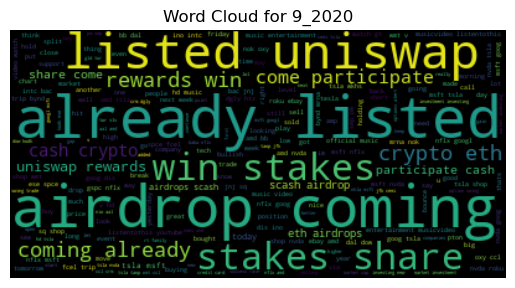

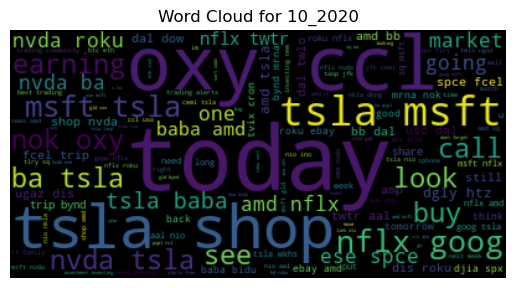

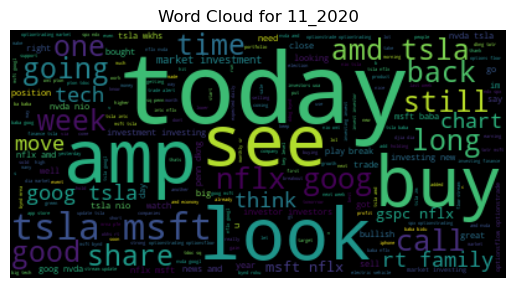

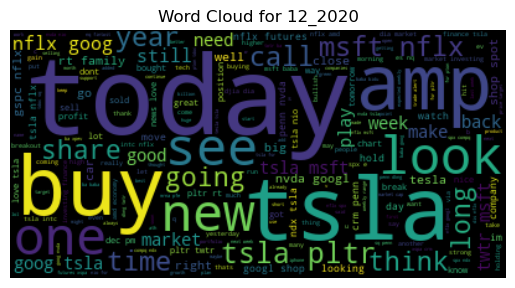

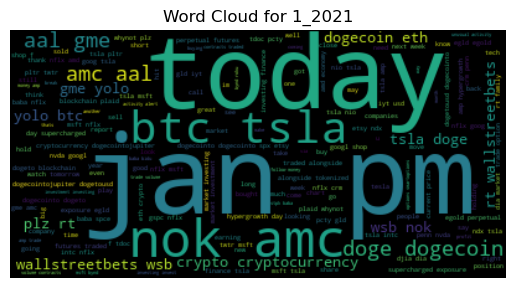

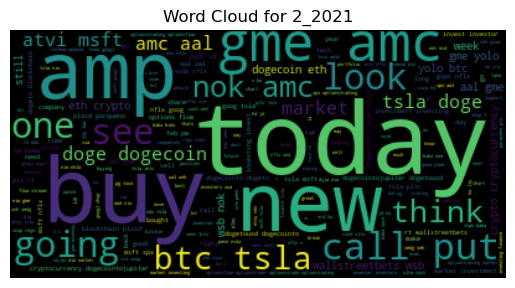

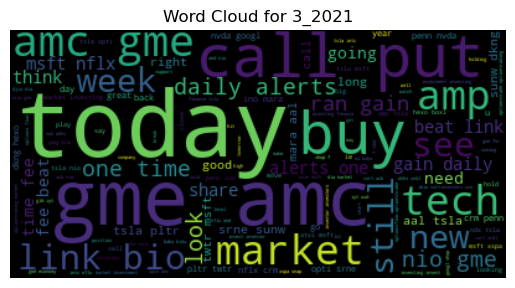

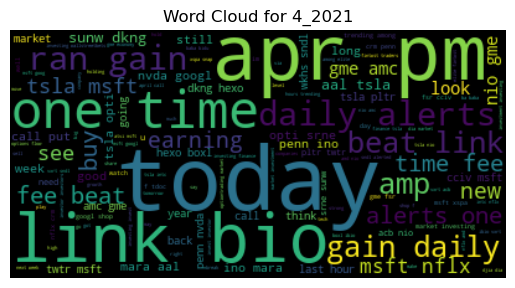

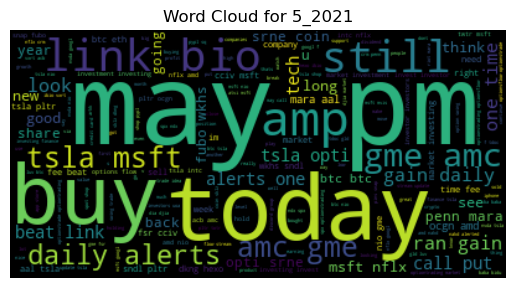

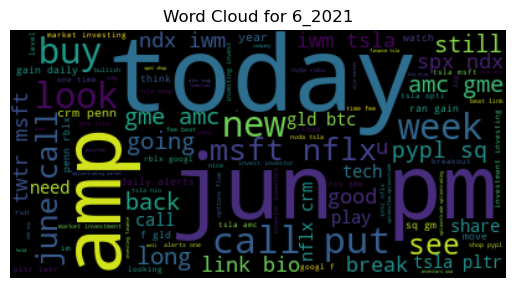

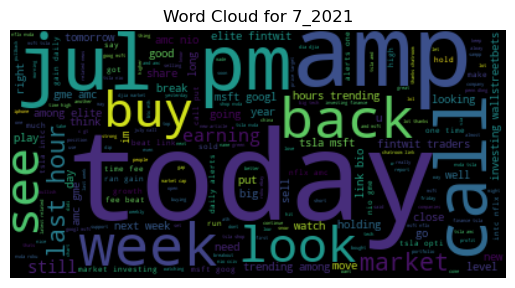

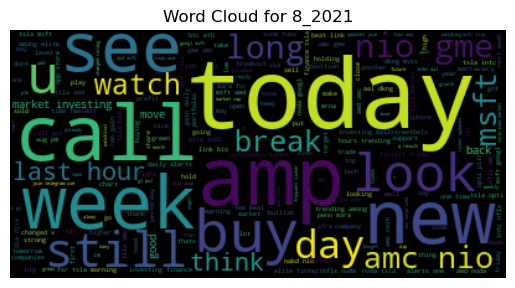

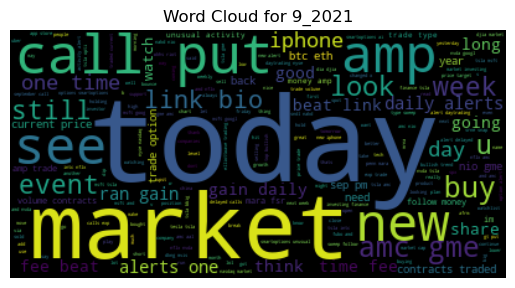

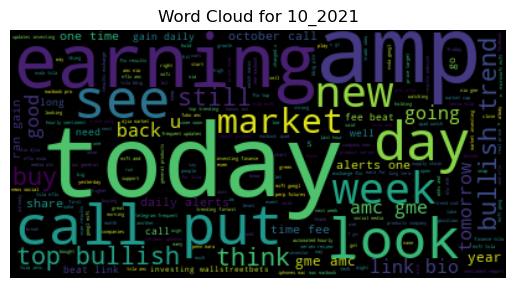

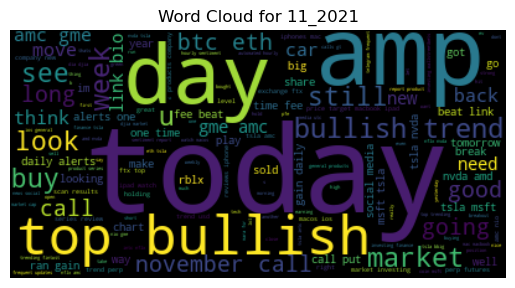

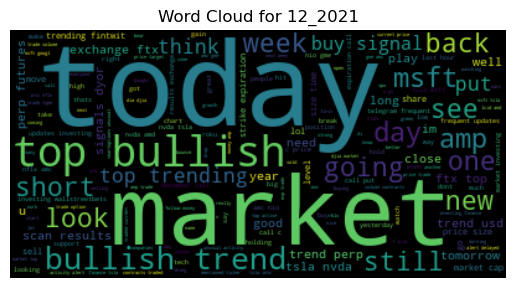

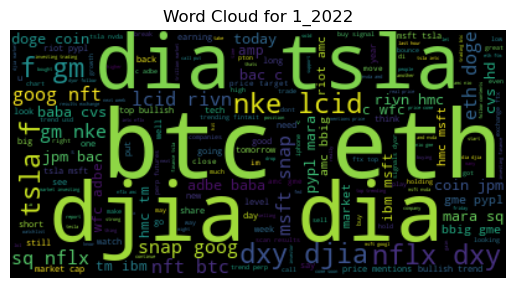

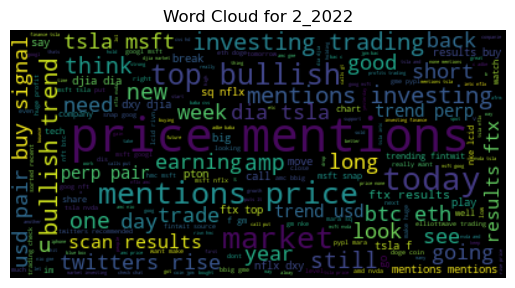

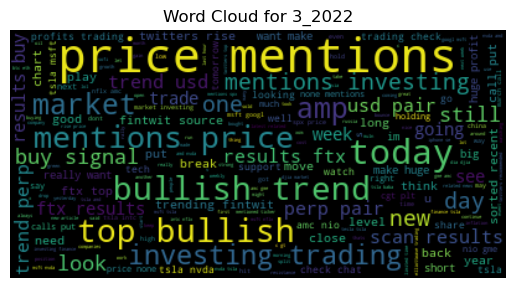

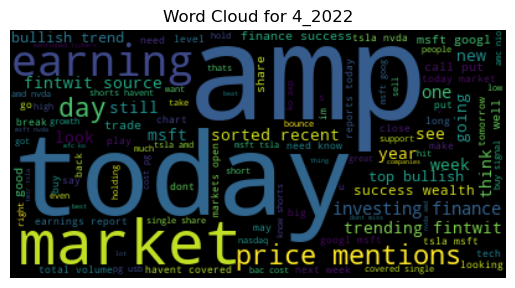

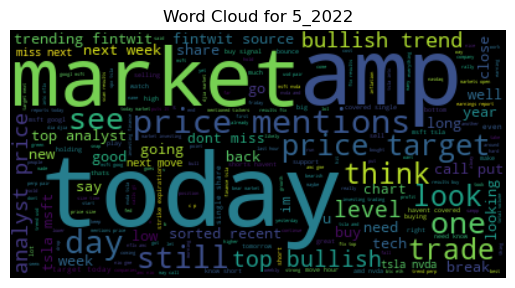

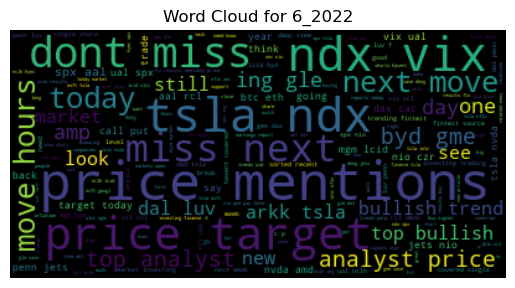

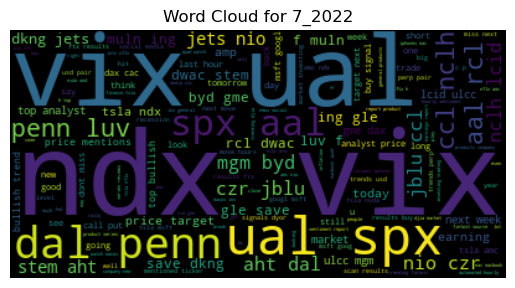

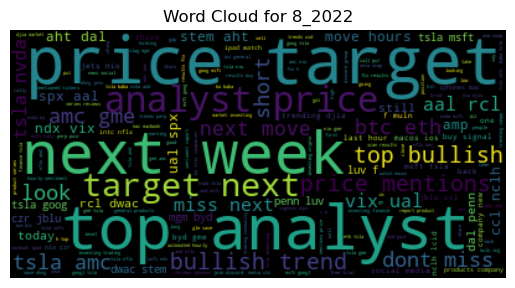

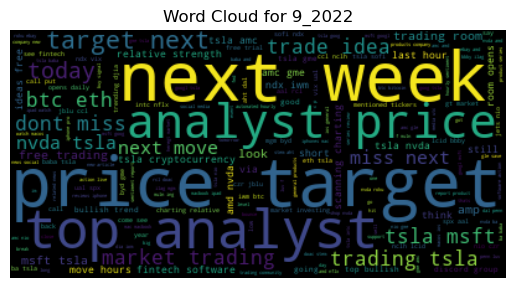

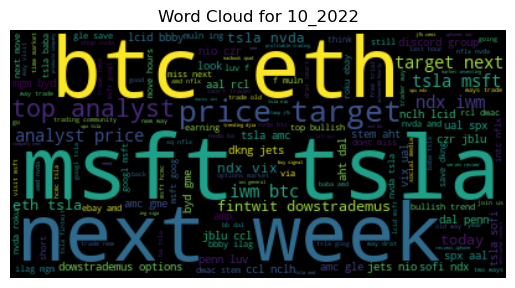

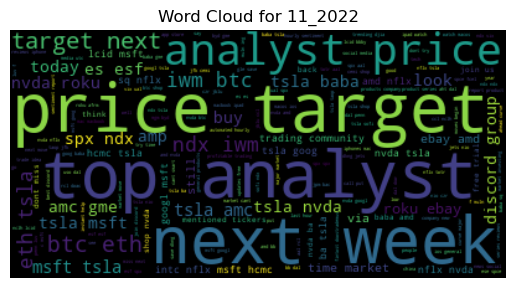

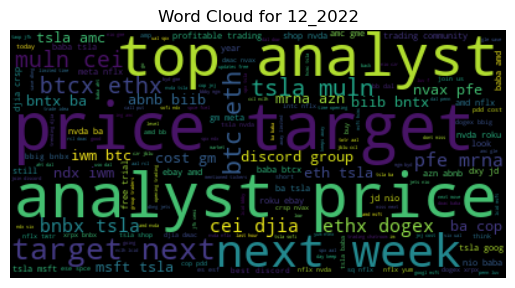

In [23]:
# Can't get a meaningful wordcloud as there are too many noise in the tweets
for _, year, month, tweet in grouped_data[['year', 'month', 'cleanedText2']].itertuples():
    wordcloud = WordCloud().generate(tweet)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {month}_{year}')
    plt.show()

Text(0, 0.5, 'Volume')

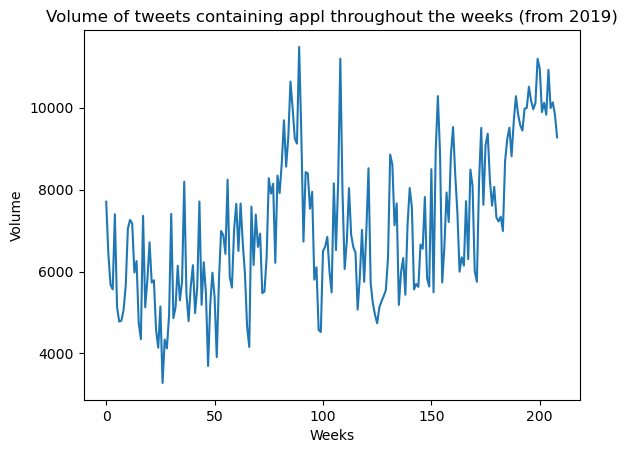

In [33]:
fig, ax = plt.subplots()
ax.plot(finalTable['Tweets_Volume'])
ax.set_title('Volume of tweets containing appl throughout the weeks (from 2019)')
ax.set_xlabel('Weeks')
ax.set_ylabel('Volume')

Text(0, 0.5, 'Number of likes')

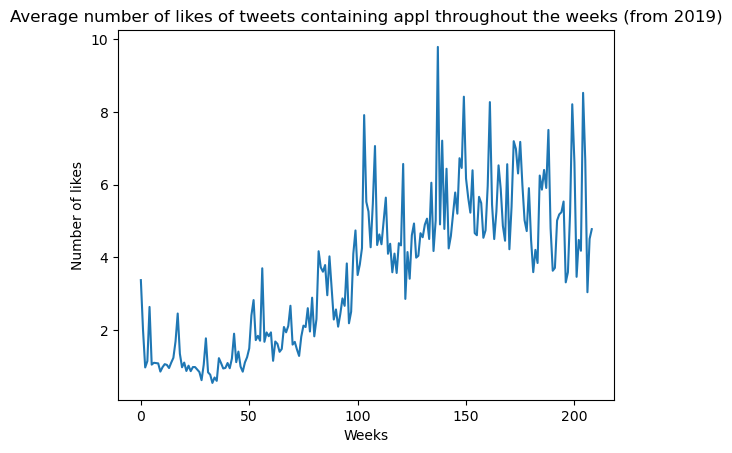

In [35]:
fig, ax = plt.subplots()
ax.plot(finalTable['Average_Likes'])
ax.set_title('Average number of likes of tweets containing appl throughout the weeks (from 2019)')
ax.set_xlabel('Weeks')
ax.set_ylabel('Number of likes')

In [44]:
finalTable[['Tweets_Volume', 'Average_Likes', 'Twitter_Weighted_Sentiment_Score']].corr()

Tweets_Volume  Average_Likes  \
Tweets_Volume                          1.000000       0.486075   
Average_Likes                          0.486075       1.000000   
Twitter_Weighted_Sentiment_Score      -0.208214      -0.161736   

                                  Twitter_Weighted_Sentiment_Score  
Tweets_Volume                                            -0.208214  
Average_Likes                                            -0.161736  
Twitter_Weighted_Sentiment_Score                          1.000000

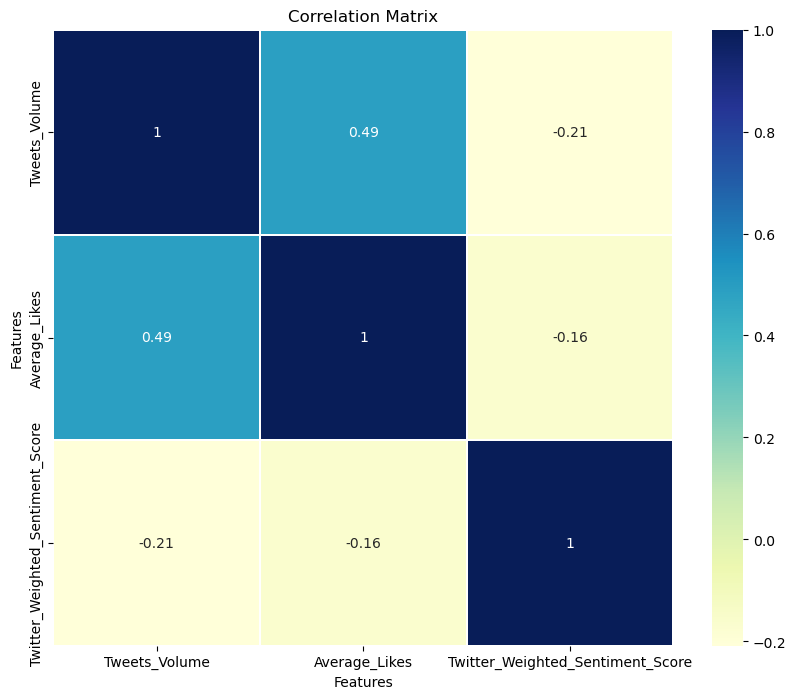

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(finalTable[['Tweets_Volume', 'Average_Likes', 'Twitter_Weighted_Sentiment_Score']].corr(), annot=True, cmap="YlGnBu", linewidths= 0.2)

plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

plt.show()

In [28]:
finalTable['weightedSentiment'].value_counts()

positive    206
neutral       2
negative      1
Name: weightedSentiment, dtype: int64

(array([ 1.,  0.,  0.,  1., 15., 50., 70., 54., 13.,  5.]),
 array([-0.16468126, -0.11251314, -0.06034503, -0.00817691,  0.0439912 ,
         0.09615932,  0.14832743,  0.20049555,  0.25266366,  0.30483178,
         0.35699989]),
 <BarContainer object of 10 artists>)

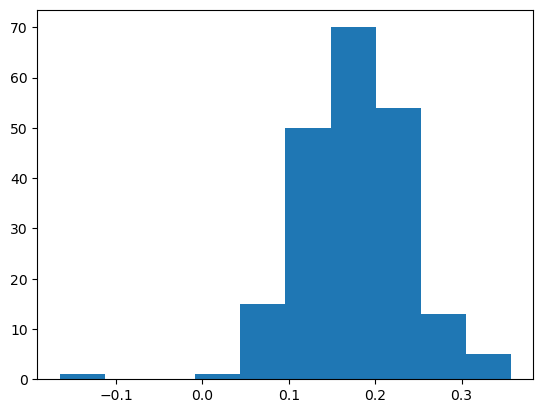

In [25]:
plt.hist(finalTable['Twitter_Weighted_Sentiment_Score'])

(array([18., 35., 50., 64., 23., 11.,  3.,  3.,  1.,  1.]),
 array([0.06459779, 0.09518071, 0.12576364, 0.15634657, 0.1869295 ,
        0.21751243, 0.24809536, 0.27867828, 0.30926121, 0.33984414,
        0.37042707]),
 <BarContainer object of 10 artists>)

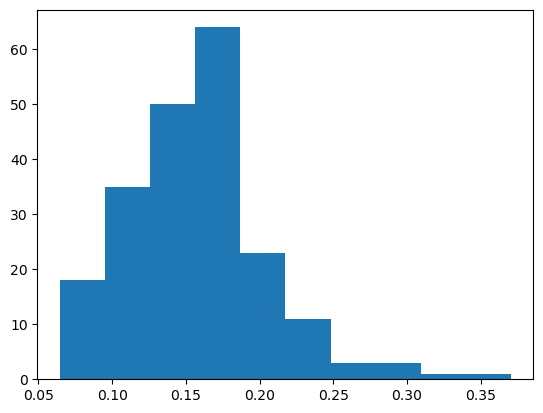

In [26]:
plt.hist(finalTable['Twitter_Sentiment_Score'])